In [1]:
import pandas as pd
import matplotlib as pb #Importing relevent Libraries

In [2]:
df = pd.read_csv("pima-data.csv")

In [3]:
df.head(2) #CSV File Check

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0


In [4]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets

In [5]:
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age', 'skin']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values
y = df[predicted_class_names].values

split_test_size = 0.30

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.3)

In [7]:
len(x_train) / len(x)*100 , len(x_test) / len(x)*100

(69.921875, 30.078125)

In [8]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

print("Total Cases : " , num_obs)
print("True Cases : " , num_true)
print("False Cases : " , num_false)
print ("True cases percentage :" , (num_true / num_obs)*100)
print ("False cases percentage :" , (num_false / num_obs)*100)

Total Cases :  768
True Cases :  268
False Cases :  500
True cases percentage : 34.89583333333333
False cases percentage : 65.10416666666666


In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 192 (35.75%)
Training False : 345 (64.25%)

Test True      : 76 (32.90%)
Test False     : 155 (67.10%)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [24]:
clf_predict = dt.predict(x_test)

In [25]:
clf_predict

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score   #Accuracy classification score

print("Accuracy: {0:.4f}".format(accuracy_score(y_test, clf_predict)))

Accuracy: 0.6970


In [46]:
NewPerson = [[3.0,50.0,70.0,35.0,200.0,45.0,0.9, 20.0 , 1.1426]]
dt.predict(NewPerson)

array([0], dtype=int64)

In [73]:
import matplotlib.pyplot as plt
from sklearn import tree

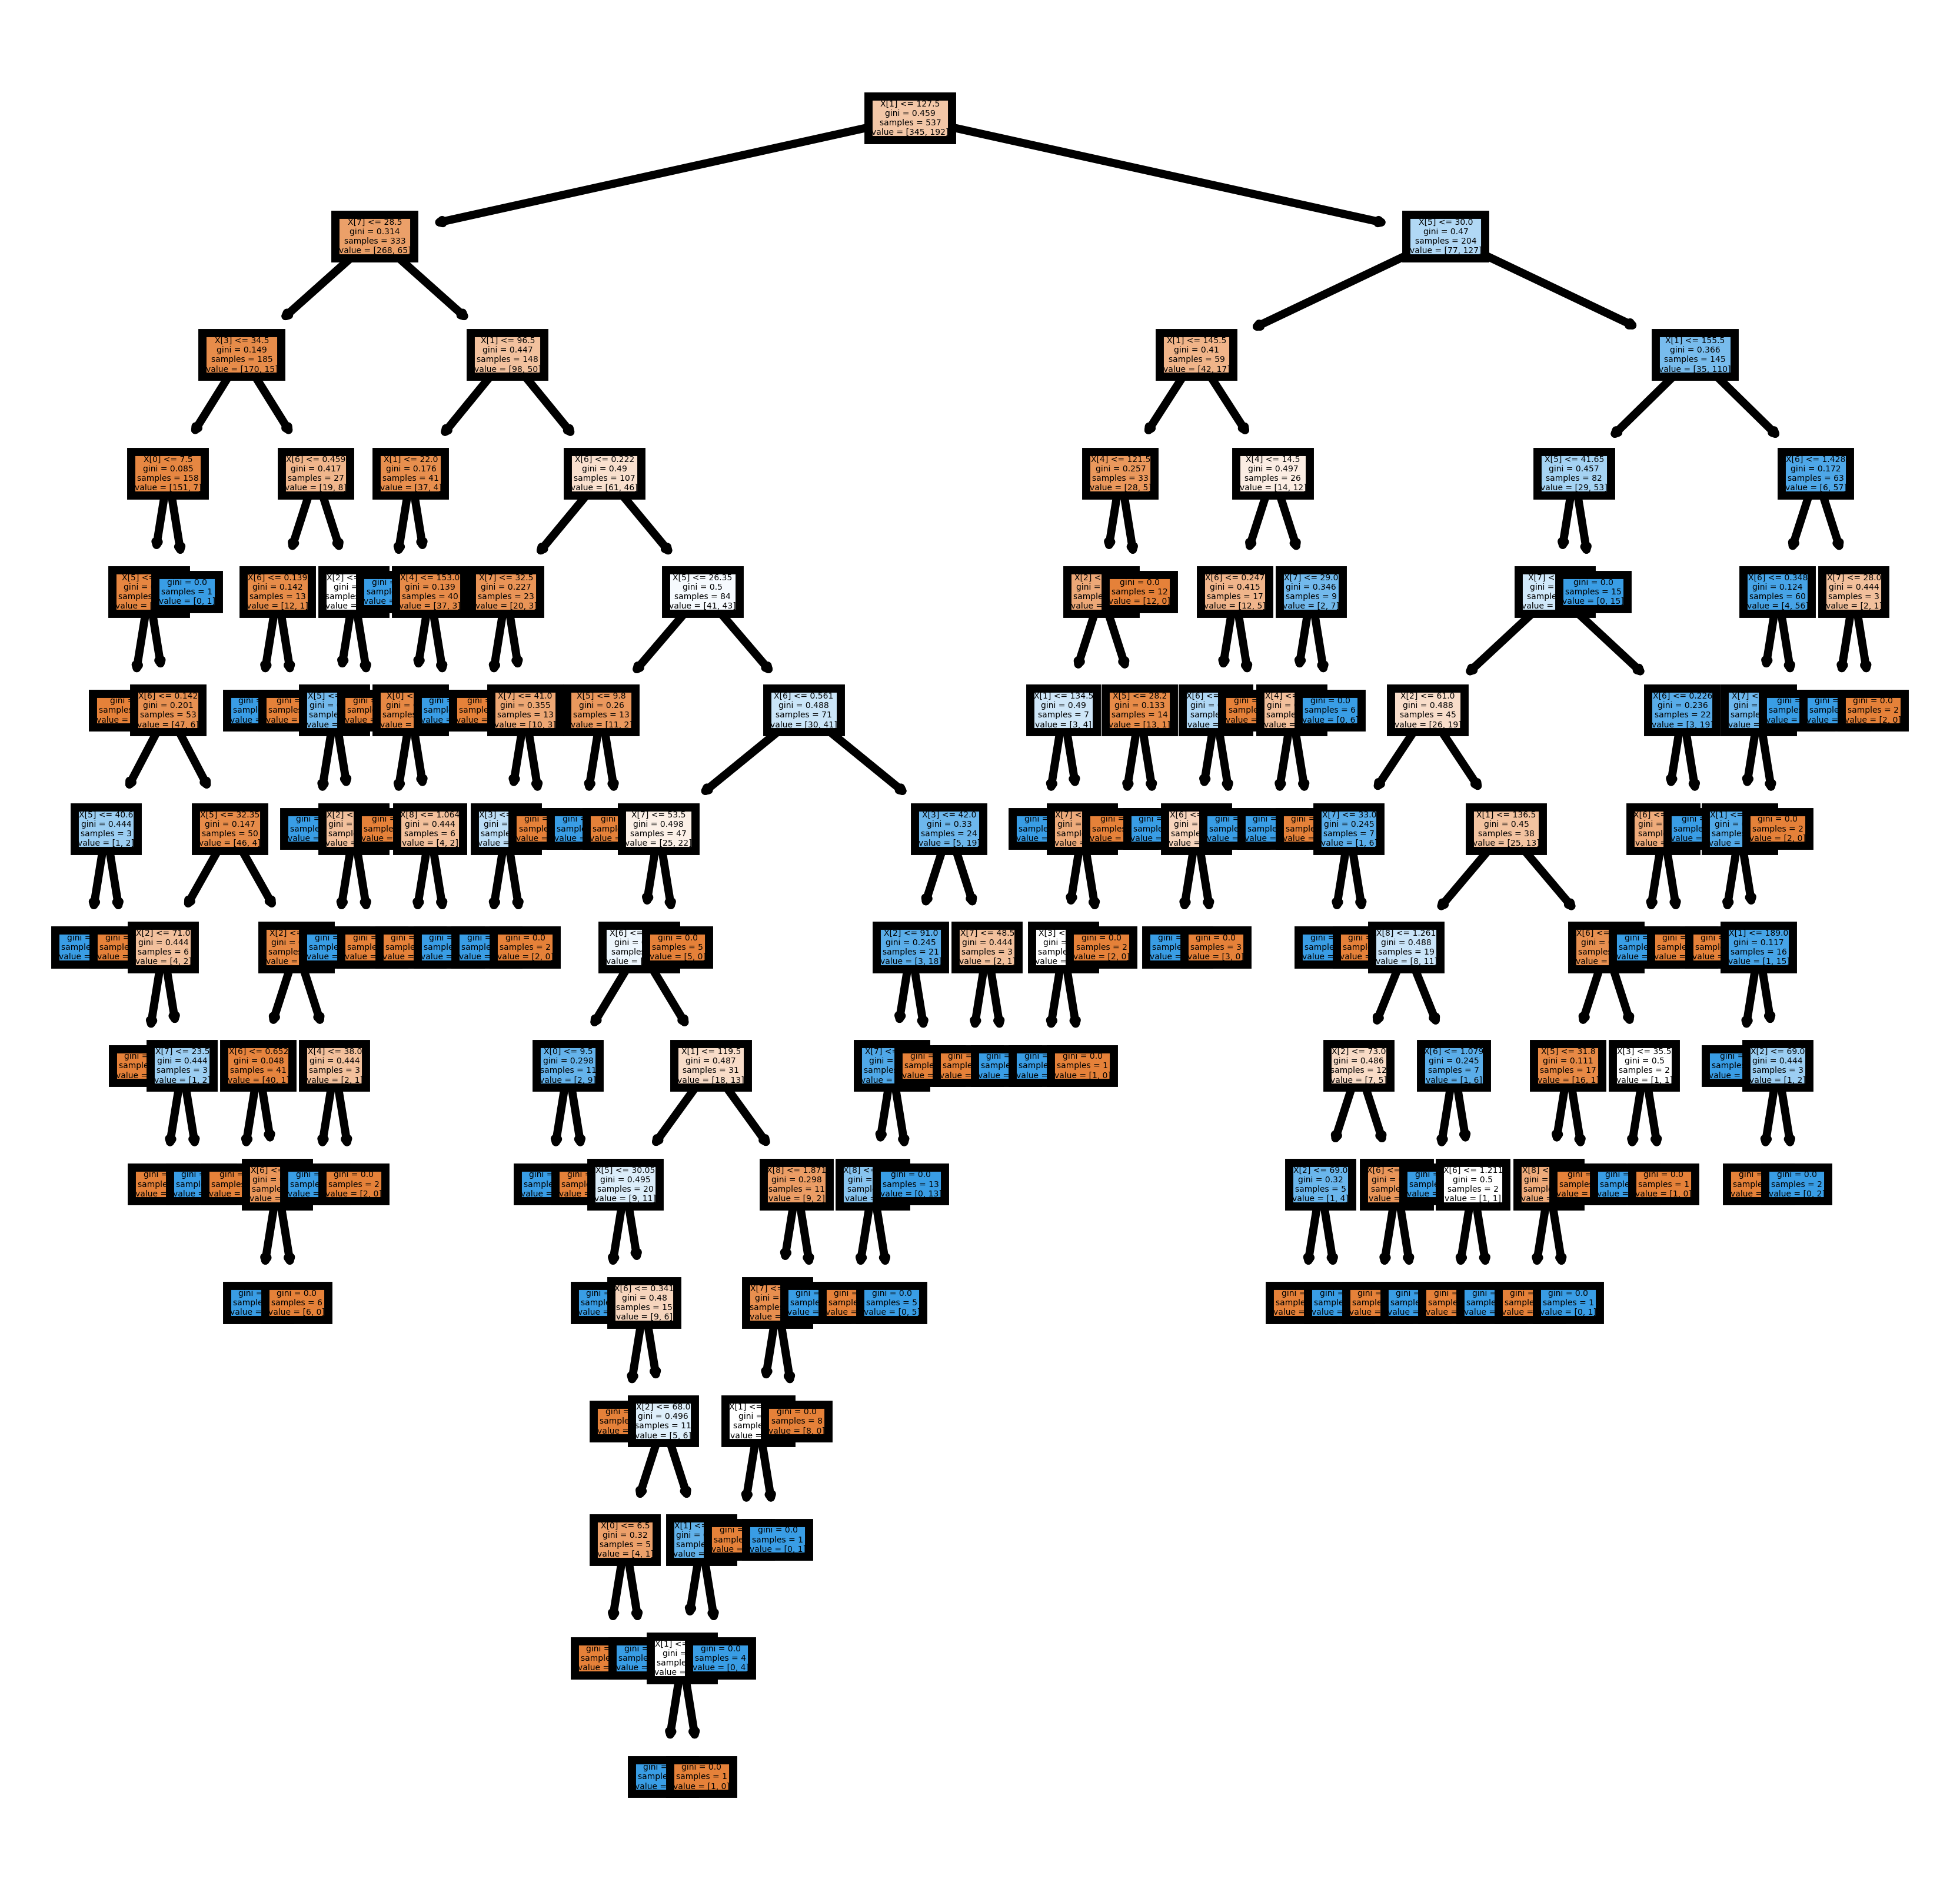

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(dt,                
               filled = True);
fig.savefig('imagename.png')